In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set(style="ticks")

In [2]:
data = pd.read_csv("../covid-19-data/us-states.csv")
data['date'] = pd.to_datetime(data.date)
data['state'] = data.state.astype(str)
data.drop(['fips'], axis=1, inplace=True)
wiki = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")[0][['State','Population estimate, July 1, 2019[2]']]
wiki.columns = ['state', 'population']

data = pd.merge(data, wiki, on='state', how='inner')
data['case_pct'] = 100 * data.cases / data.population
data.set_index('date', inplace=True)

#adj_states = pd.read_table("https://introcs.cs.princeton.edu/java/data/contiguous-usa.dat", delimiter=' ', header=None, names=['st1', 'st2'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1645 entries, 2020-01-21 to 2020-04-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       1645 non-null   object 
 1   cases       1645 non-null   int64  
 2   deaths      1645 non-null   int64  
 3   population  1645 non-null   int64  
 4   case_pct    1645 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 77.1+ KB


In [4]:
data.groupby(['state'])[['cases', 'deaths', 'case_pct']].describe()

cases                                            \
                         count          mean           std   min     25%   
state                                                                      
Alabama                   20.0    361.750000    378.127502   6.0   48.00   
Alaska                    21.0     47.285714     49.328636   1.0    6.00   
Arizona                   67.0    123.537313    315.087498   1.0    1.00   
Arkansas                  22.0    208.772727    206.361202   1.0   22.00   
California                68.0    962.691176   2137.159115   1.0    7.00   
Colorado                  28.0    783.892857   1017.721469   2.0   45.25   
Connecticut               25.0    726.520000   1048.659109   1.0   20.00   
Delaware                  22.0    102.500000    112.177474   1.0   10.00   
District of Columbia      26.0    150.153846    177.539335   1.0   11.50   
Florida                   32.0   1354.750000   2172.489029   2.0   13.75   
Georgia                   31.0    866.903226   1303.376164   2.0   19.50   
Guam                      18.0     41.166667     42.094082   3.0   12.50   
Hawaii                    27.0     64.148148     77.830043   1.0    2.00   
Idaho                     20.0    151.300000    194.750880   1.0   10.50   
Illinois                  69.0    582.855072   1466.413996   1.0    2.00   
Indiana                   27.0    468.074074    739.719070   1.0   12.00   
Iowa                      25.0    133.600000    163.375080   3.0   18.00   
Kansas                    26.0    110.923077    148.305340   1.0    6.50   
Kentucky                  27.0    151.111111    199.457019   1.0   11.00   
Louisiana                 24.0   1472.458333   1837.229435   1.0   96.50   
Maine                     21.0    116.857143    106.633149   1.0   32.00   
Maryland                  28.0    385.714286    567.315045   3.0   13.00   
Massachusetts             61.0    691.557377   1698.862124   1.0    1.00   
Michigan                  23.0   2109.739130   2780.887795   2.0   53.50   
Minnesota                 27.0    191.259259    217.608787   1.0   11.50   
Mississippi               22.0    312.090909    350.607080   1.0   14.25   
Missouri                  26.0    312.076923    464.483018   1.0    4.25   
Montana                   20.0     70.850000     72.340041   4.0   11.00   
Nebraska                  45.0     46.088889     54.892797  10.0   13.00   
Nevada                    28.0    290.642857    390.133521   2.0   10.00   
New Hampshire             31.0     85.387097    116.988796   1.0    4.50   
New Jersey                29.0   3958.241379   6390.213738   1.0   23.00   
New Mexico                22.0    106.727273    110.435149   4.0   21.50   
New York                  32.0  17107.343750  25681.583199   1.0  133.00   
North Carolina            30.0    340.133333    495.129362   1.0    7.25   
North Dakota              22.0     42.500000     45.384862   1.0    2.00   
Northern Mariana Islands   5.0      2.800000      1.788854   2.0    2.00   
Ohio                      24.0    610.833333    784.972149   3.0   34.25   
Oklahoma                  27.0    140.296296    204.402660   1.0    2.50   
Oregon                    34.0    157.500000    218.559367   1.0    7.75   
Pennsylvania              27.0   1098.703704   1686.016238   2.0   31.50   
Puerto Rico               20.0     64.050000     82.723684   3.0    5.00   
Rhode Island              32.0     98.000000    149.425783   2.0    3.00   
South Carolina            27.0    282.074074    370.532250   2.0   12.50   
South Dakota              23.0     36.608696     37.548440   5.0    9.50   
Tennessee                 28.0    519.178571    699.151181   1.0   15.50   
Texas                     50.0    493.080000   1007.231199   1.0   10.00   
Utah                      37.0    177.783784    285.057999   1.0    1.00   
Vermont                   26.0     83.500000    103.678059   1.0    2.75   
Virginia                  26.0    326.653846    428.882822   1.0   33.00 

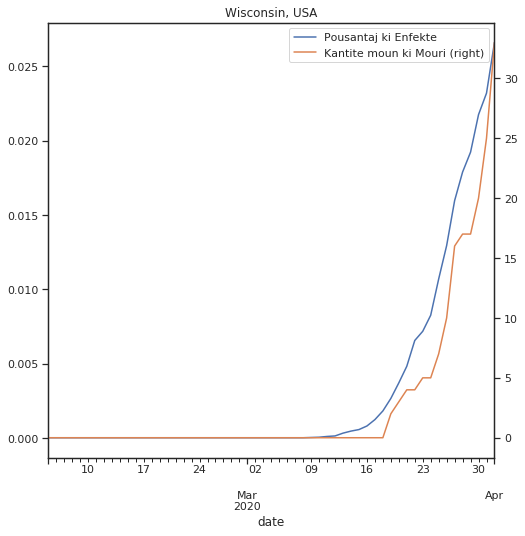

In [16]:
ax=data.query("state=='Wisconsin'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Wisconsin, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/WI.png")

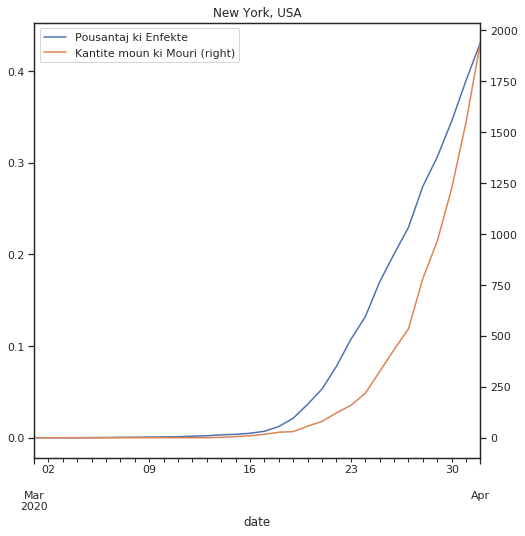

In [17]:
ax=data.query("state=='New York'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="New York, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/NY.png")

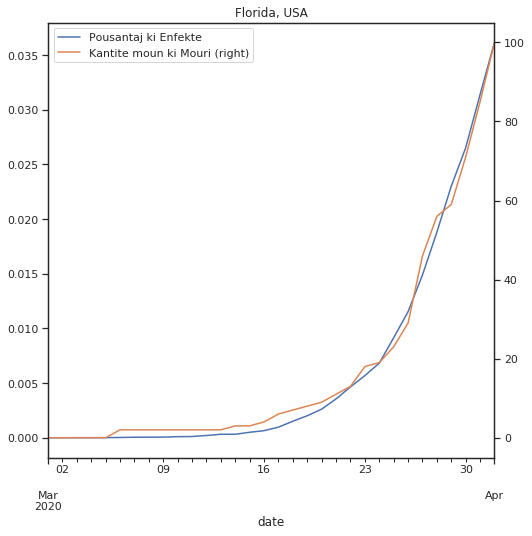

In [18]:
ax=data.query("state=='Florida'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Florida, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/FL.png")

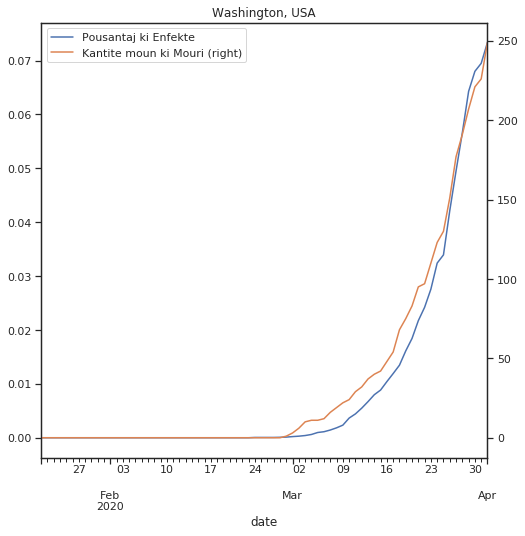

In [19]:
ax=data.query("state=='Washington'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Washington, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/WA.png")